In [1]:
import sys
sys.path.insert(1, 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\impedance.py') #\\impedance')
import numpy as np
import matplotlib.pyplot as plt
from impedance.circuits import CustomCircuit
from impedance.plotting_BG import plot_nyquist
from impedance import preprocessing

from scipy.optimize import least_squares
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize

import ImpedanceCorrection as IC
%reload_ext autoreload
%autoreload 2

In [8]:
Circuit1 = CustomCircuit(circuit='p(C1,p(R1,R2-L1))', initial_guess=[1.4e-4, 3.5, 21, 0.1225])
Circuit1a = CustomCircuit(circuit='p(C1,p(R1,R2-L1))', initial_guess=[1e-16, 3.5, 21, 0.1225])

f_1 = np.logspace(0, 4 ,num=41)

Z_1 = Circuit1.predict(f_1)
Z_1a = Circuit1a.predict(f_1)

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


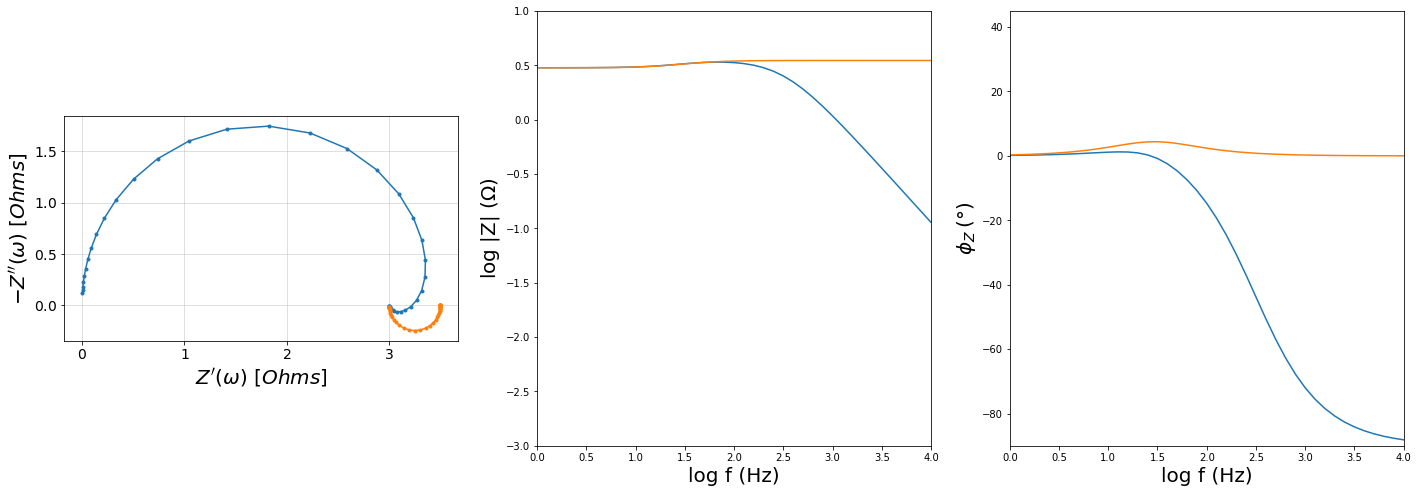

In [20]:
# Figure 1

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 8))
plot_nyquist(ax1, Z_1)
plot_nyquist(ax1, Z_1a)
ax2.plot(np.log10(f_1), np.log10(np.abs(Z_1)))
ax2.plot(np.log10(f_1), np.log10(np.abs(Z_1a)))
ax3.plot(np.log10(f_1), np.angle(Z_1, deg=True))
ax3.plot(np.log10(f_1), np.angle(Z_1a, deg=True))

ax2.set_xlim(0, 4)
ax2.set_ylim(-3, 1)
ax3.set_xlim(0, 4)
ax3.set_ylim(-90, 45)

ax2.set_xlabel(r'log f (Hz)', fontsize=20)
ax2.set_ylabel(r'log |Z| ($\Omega$)', fontsize=20)
ax3.set_xlabel(r'log f (Hz)', fontsize=20)
ax3.set_ylabel(r'$\phi_Z \: (°)$', fontsize=20)
plt.show()

In [54]:
Circuit2 = CustomCircuit(circuit='p(C1,R1-p(R2,C2)-p(L1,R3))', initial_guess=[5e-3, 1, 2, 5e-3, 0.1, 1])
Circuit2a = CustomCircuit(circuit='p(C1,R1-p(R2,C2)-p(L1,R3))', initial_guess=[1e-16, 1, 2, 5e-3, 0.1, 1])

f_2 = np.logspace(3, -1,num=41)

Z_2 = Circuit2.predict(f_2)
Z_2a = Circuit2a.predict(f_2)
print(Circuit2, Circuit2a)

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters

Circuit string: p(C1,R1-p(R2,C2)-p(L1,R3))
Fit: False

Initial guesses:
     C1 = 5.00e-03 [F]
     R1 = 1.00e+00 [Ohm]
     R2 = 2.00e+00 [Ohm]
     C2 = 5.00e-03 [F]
     L1 = 1.00e-01 [H]
     R3 = 1.00e+00 [Ohm]
 
Circuit string: p(C1,R1-p(R2,C2)-p(L1,R3))
Fit: False

Initial guesses:
     C1 = 1.00e-16 [F]
     R1 = 1.00e+00 [Ohm]
     R2 = 2.00e+00 [Ohm]
     C2 = 5.00e-03 [F]
     L1 = 1.00e-01 [H]
     R3 = 1.00e+00 [Ohm]



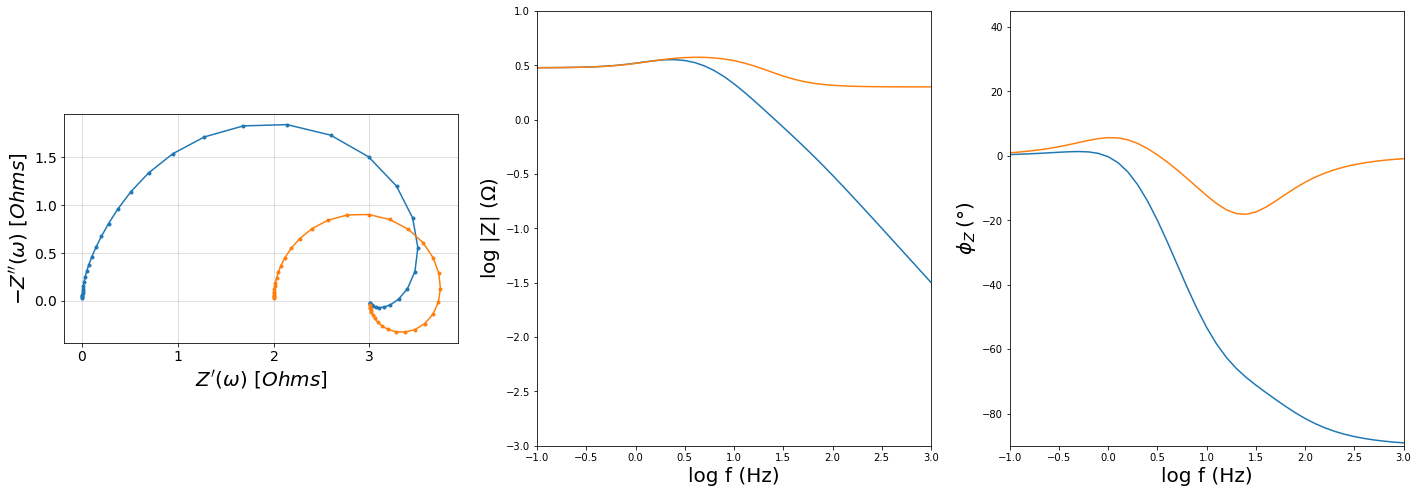

In [55]:
# Figure 2

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 8))
plot_nyquist(ax1, Z_2)
plot_nyquist(ax1, Z_2a)
ax2.plot(np.log10(f_2), np.log10(np.abs(Z_2)))
ax2.plot(np.log10(f_2), np.log10(np.abs(Z_2a)))
ax3.plot(np.log10(f_2), np.angle(Z_2, deg=True))
ax3.plot(np.log10(f_2), np.angle(Z_2a, deg=True))

ax2.set_xlim(-1, 3)
ax2.set_ylim(-3, 1)
ax3.set_xlim(-1, 3)
ax3.set_ylim(-90, 45)

ax2.set_xlabel(r'log f (Hz)', fontsize=20)
ax2.set_ylabel(r'log |Z| ($\Omega$)', fontsize=20)
ax3.set_xlabel(r'log f (Hz)', fontsize=20)
ax3.set_ylabel(r'$\phi_Z \: (°)$', fontsize=20)
plt.show()

In [45]:
C_guess1 = np.logspace(-4, -3, num=500)

LY_1 = []

for Cdl in C_guess1:
    LY_1.append(IC.Par_Cap_Res(Cdl, f_1, Z_1))
    
Cdl_1 = C_guess1[np.argmin(LY_1)]
Z_1f = IC.par_cap_subtract(Cdl_1, f_1, Z_1)
print(Cdl_1)

0.00014005305453932196


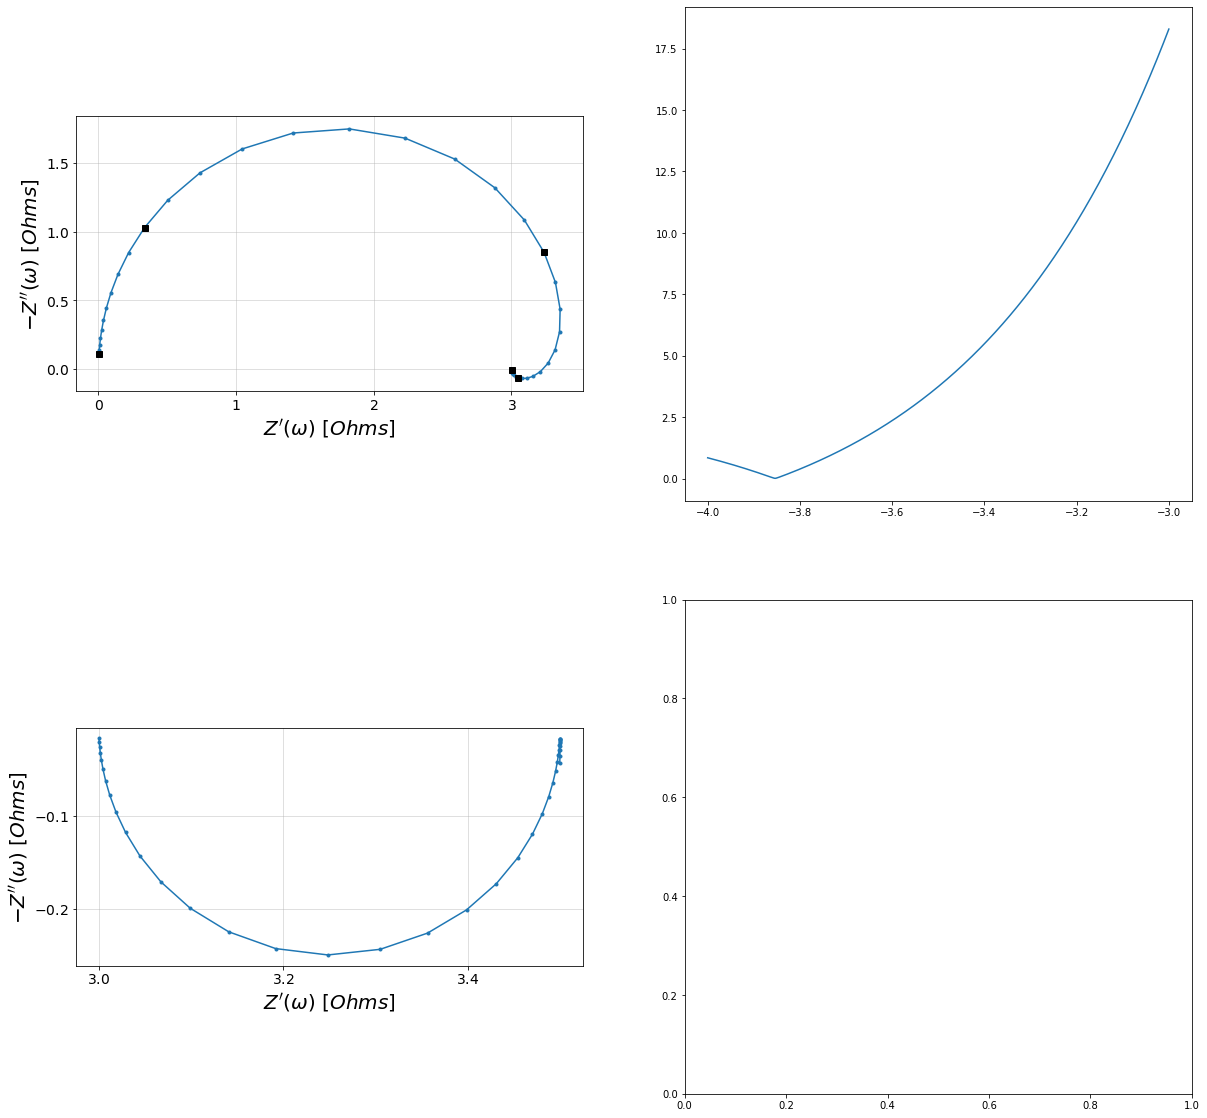

In [46]:
# Figure 3

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

plot_nyquist(ax1[0], Z_1)
plot_nyquist(ax1[0], Z_1[np.mod(np.log10(f_1), 1) ==0], fmt='s', c=(0,0,0))
ax1[1].plot(np.log10(C_guess1), LY_1)
plot_nyquist(ax2[0], Z_1f)

In [48]:
for i, Z in enumerate(Z_1):
    print(i,Z, f_1[i])

0 (3.000554928626001+0.007773003583221669j) 1.0
1 (3.0008789802986624+0.009772290369178038j) 1.2589254117941673
2 (3.0013917798197447+0.012276003784217058j) 1.5848931924611136
3 (3.002202539128113+0.015401659093478372j) 1.9952623149688797
4 (3.0034825719565887+0.01928434617923259j) 2.51188643150958
5 (3.005498981406975+0.024068868360496445j) 3.1622776601683795
6 (3.0086642099471166+0.029888293953517876j) 3.981071705534973
7 (3.0136053328563355+0.03681555367058935j) 5.011872336272724
8 (3.021252230231311+0.04476469953231939j) 6.309573444801933
9 (3.032928657462802+0.053305165184426184j) 7.943282347242816
10 (3.050394367289423+0.061343087749712005j) 10.0
11 (3.075720579937076+0.06664303223623493j) 12.589254117941675
12 (3.1108030679313985+0.06526289978151036j) 15.848931924611142
13 (3.156328380140665+0.05120286784924039j) 19.952623149688797
14 (3.210311619173579+0.016827086023062713j) 25.11886431509581
15 (3.266964707021788-0.045521988284705155j) 31.622776601683793
16 (3.316990498680485-

In [53]:
print(f_1, '\n', f_1[:-1].sort())

[1.25892541e+00 1.58489319e+00 1.99526231e+00 2.51188643e+00
 3.16227766e+00 3.98107171e+00 5.01187234e+00 6.30957344e+00
 7.94328235e+00 1.00000000e+01 1.25892541e+01 1.58489319e+01
 1.99526231e+01 2.51188643e+01 3.16227766e+01 3.98107171e+01
 5.01187234e+01 6.30957344e+01 7.94328235e+01 1.00000000e+02
 1.25892541e+02 1.58489319e+02 1.99526231e+02 2.51188643e+02
 3.16227766e+02 3.98107171e+02 5.01187234e+02 6.30957344e+02
 7.94328235e+02 1.00000000e+03 1.25892541e+03 1.58489319e+03
 1.99526231e+03 2.51188643e+03 3.16227766e+03 3.98107171e+03
 5.01187234e+03 6.30957344e+03 7.94328235e+03 1.00000000e+04
 1.00000000e+00] 
 None
